# 1. fashion MNIST
다음의 조건을 만족하면서 test 데이터에 대한 예측의 정확도를 최대로 높여라.
* CNN을 이용한다. 그 외에 인공신경망 구조는 자유롭게 선택한다.
* model은 클래스를 이용하여 직접 작성한다.
* output은 10개(0~9)로 설정한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

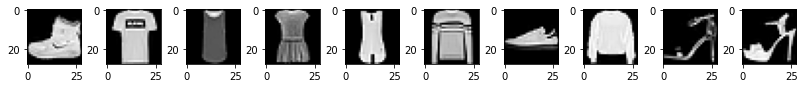

In [2]:
plt.figure(figsize=(14,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_data.data[i],cmap=plt.cm.gray);

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
# mini batch
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)

In [6]:
import torch.nn as nn
class cnn(nn.Module): 
    def __init__(self): 
        super(cnn, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(12, 24, 3, padding=1)
        self.fc1 = nn.Linear(7*7*24, 128)
        self.fc2 = nn.Linear(128,10)

    def forward(self, x):
        # convoultion # input (28 * 28 * 1)
        x = self.conv1(x) # (28 * 28 * 12)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2) # (14 * 14 * 12)
        x = self.conv2(x) # (14 * 14 * 24)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2) # (7 * 7 * 24)
        
        # fully connected
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [7]:
model = cnn()

# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [8]:
class Print(nn.Module):
    def forward(self, x):
        print(x.size())
        return x

In [9]:
model

cnn(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# training
def train(model, criterion, optimizer, data):
    model.train() # training
    for X,y in data:
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases

In [11]:
def evaluation(model, criterion, optimizer, data):
    model.eval() #evaluation
    test_loss = 0
    accuracy = 0
    
    with torch.no_grad(): # no update
        for X, y in data:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy        

In [12]:
nums_epoch = 100
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    
    if(epoch%20==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "test", accu.item())

0 loss= 170.45663452148438 test 0.7699999809265137
20 loss= 155.51341247558594 test 0.8700000047683716
40 loss= 155.27725219726562 test 0.8799999952316284
60 loss= 155.1282958984375 test 0.8600000143051147
80 loss= 154.96102905273438 test 0.8500000238418579


# 2. 아래의 글을 읽고 500자 이내로 감상문을 작성하세요.

알파폴드 사태에 대한 글을 읽고 AI가 나의 생각보다 빠르게 발전하고 있는 것을 느꼈다. 단백질 구조 예측 대회에서 수십 년간의 학문적 성과를 가지고 있던 기존 툴을 알파폴드가 앞질렀다는 내용은 충격적이었다. 돌이켜 생각해보면 몇 년전 세계를 시끄럽게 했던 알파고가 생각났다. 기존의 바둑 경기나 공식들을 딥러닝한 알파고가 세계의 정상급 바둑기사들을 이기는 모습이 떠올랐다. 우리는 현재 대규모 데이터 축적의 시대에 살고 있다. 지금까지 수많은 자연 현상들이 연구되어 이론을 정립되었지만 아직도 많은 것들이 풀리지 않고 있다. AI의 가능성이 만능은 아니지만 그럼에도 우리가 연구하고 있는 모든 분야에 적용이 가능할 것이다. 알파폴드 사태를 보았듯이 우리는 우리의 영역안에만 머무르면 안된다. AI를 이용하여 더 발전을 하려고 노력해야 할 것이다. 불과 몇 년만에 폭발적으로 발전한 AI를 이용한다면 공상과학 영화에서만 보던 기술들이 현실이 되기까지 발전하는 것이 가능할 것이다.